# Image classifier using Tensorflow Sequential API

For this problem the input is images of resolution 28 * 28 and output will be an index of 10. 
There are 70000 images in this fanish minist datasets

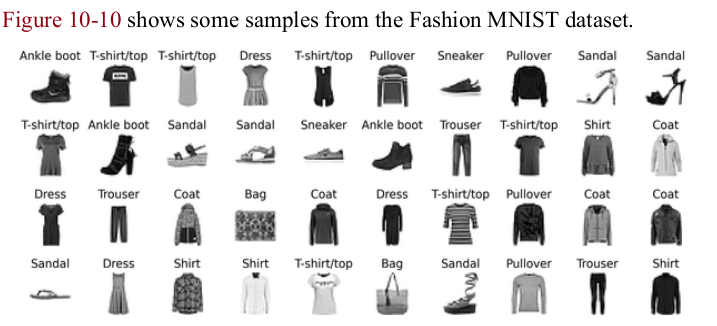

If tensorflow is not installed, use this command to install it 
`pip install tensorflow`

In [1]:
import tensorflow as tf

2024-06-21 20:46:12.410852: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 20:46:12.414320: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-21 20:46:12.454448: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 20:46:13.416831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Load the data and split it into traning, validation and testing data sets

In [2]:
fashion_data = tf.keras.datasets.fashion_mnist.load_data()

(x_train_full, y_train_full), (x_test, y_test) = fashion_data
x_train , y_train = x_train_full[:-5000] , y_train_full[:-5000]
x_valid , y_valid = x_train_full[-5000:] , y_train_full[-5000:]

Changing the resolution from 255 b/w 0 and 1

In [3]:
x_train , x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
x_train_full = x_train_full / 255.0

Output labels

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train_full[0]]

'Ankle boot'

### Model training and evaluvation

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

/home/james/HDD/OneDrive/Cloud/tutorials/.conda/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Getting details about the model layers and weights

In [6]:
print(model.layers[0])
hidden_layer_1 = model.layers[1]
hidden_layer_1.get_weights()

<Flatten name=flatten, built=True>


[array([[ 0.01600556, -0.04616104, -0.03725425, ...,  0.03684314,
          0.00839777,  0.05404982],
        [-0.05076553,  0.03526419,  0.07026973, ...,  0.05314501,
         -0.04090514,  0.04233071],
        [ 0.05264336, -0.03593028, -0.0063609 , ..., -0.0698608 ,
          0.00888099,  0.0348616 ],
        ...,
        [ 0.05736892,  0.00755982, -0.05026305, ..., -0.02375035,
          0.02347828, -0.06329732],
        [-0.02299995, -0.00675919, -0.02287035, ...,  0.07076366,
         -0.03190267,  0.06815982],
        [ 0.00733642, -0.00380539,  0.04233942, ...,  0.01892383,
          0.00733549, -0.06901304]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Compling the model
* if it is multi class classfication problem with index 0 - 9 `sparse_categorical_crossentropy` is used
* if it is one hot like [1,0,....0] then `categorical_crossentropy` will be used
* if it is binary classfication probelem then `binary_crossentropy` will be used

In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Training the model

if required we can pass the `validation_split` parameter tells keras to use the last 10% data for validation. 

model.fit(x_train_full, y_train_full, epochs=30, validation_split=0.1)

In [8]:
history = model.fit(x_train_full, y_train_full, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


2024-06-21 20:46:15.348033: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6964 - loss: 0.9734 - val_accuracy: 0.8238 - val_loss: 0.4965
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8270 - loss: 0.4942 - val_accuracy: 0.8364 - val_loss: 0.4528
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8454 - loss: 0.4428 - val_accuracy: 0.8568 - val_loss: 0.3986
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8562 - loss: 0.4120 - val_accuracy: 0.8600 - val_loss: 0.3880
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8620 - loss: 0.3921 - val_accuracy: 0.8724 - val_loss: 0.3604
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8696 - loss: 0.3712 - val_accuracy: 0.8702 - val_loss: 0.3630
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8749 - loss: 0.3546 - val_accuracy: 0.8758 - val_loss: 0.3530
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8760 - loss: 0.3505 - val_accurac

Plotting the train and validation accurancy and loss values 

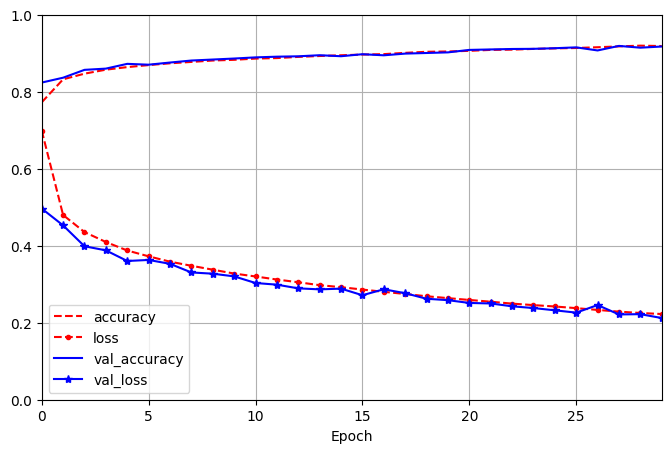

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

Evaluvating the model on the test data

In [13]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.8842 - loss: 0.3229


[0.322509765625, 0.8826000094413757]

### Model prediction

In [23]:
y_pred = model.predict(x_test[:3])
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

printing the output class names

In [39]:
import numpy as np
predicted = np.array(class_names)[y_pred.argmax(axis=1)]
actual_output = np.array(class_names)[y_test[:3]]

print(f'Predicted Output: {predicted}')
print(f'Actual_output : {actual_output}')


Predicted Output: ['Ankle boot' 'Pullover' 'Trouser']
Actual_output : ['Ankle boot' 'Pullover' 'Trouser']
